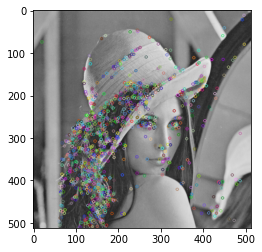

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#1.1

#Getting GrayScale Images
left_backpack_img = cv2.imread('backpack_left.png')
left_backpack_img_GRAY = cv2.cvtColor(left_backpack_img, cv2.COLOR_BGR2GRAY)
right_backpack_img = cv2.imread('backpack_right.png')
right_backpack_img_GRAY = cv2.cvtColor(right_backpack_img, cv2.COLOR_BGR2GRAY)
lena = cv2.imread('lena.png')
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

#Initialize the SIFT module in Python using
my_SIFT_instance = cv2.SIFT_create()

#Generate the image’s keypoints and descriptors for possible matches
left_KeyPoints, left_Descriptors = my_SIFT_instance.detectAndCompute(left_backpack_img, None)
Right_KeyPoints, right_Descriptors = my_SIFT_instance.detectAndCompute(right_backpack_img, None)
lena_keypoints, lena_Descriptors = my_SIFT_instance.detectAndCompute(lena, None)


# Draw detected keypoints
left_backpack_img_points = cv2.drawKeypoints(left_backpack_img_GRAY, left_KeyPoints, left_backpack_img)
right_backpack_img_POINTS = cv2.drawKeypoints(right_backpack_img_GRAY, Right_KeyPoints, right_backpack_img)
lena_points = cv2.drawKeypoints(lena_gray, lena_keypoints, lena)

# Detected keypoints for lena image
plt.imshow(lena_points)

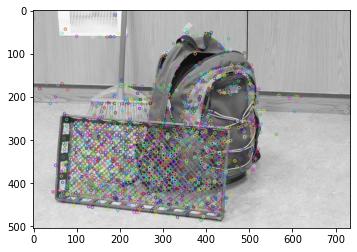

In [17]:
# Detected keypoints for the left back pack
plt.imshow(left_backpack_img_points)


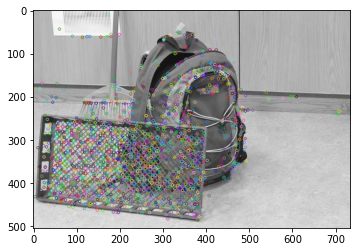

In [18]:
# Detected keypoints for the right back pack
plt.imshow(right_backpack_img_POINTS)

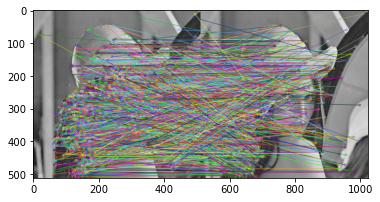

In [19]:
# Find matches with your descriptors for Lena
matched_lena = cv2.BFMatcher()
num_matches_lena = matched_lena.knnMatch(lena_Descriptors,lena_Descriptors, k=2)
Arr_matches = [] 
for i,j in num_matches_lena:
    Arr_matches.append([j])
#Display all of your matches across the images using .drawMatchesKnn
num_matches_lena_drawn = cv2.drawMatchesKnn(lena_gray,lena_keypoints,lena_gray,lena_keypoints,Arr_matches,None,flags=2)
plt.imshow(num_matches_lena_drawn)


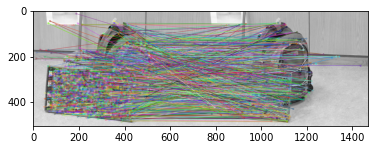

In [20]:
# Find matches with your descriptors for backpacks 
matched_backpack = cv2.BFMatcher()
num_matches_backpack = matched_backpack.knnMatch(left_Descriptors, right_Descriptors, k=2)
Arr_matches = []
for i,j in num_matches_backpack:
    Arr_matches.append([j])
#Display all of your matches across the images using .drawMatchesKnn
num_matches_backpack_drawn = cv2.drawMatchesKnn(left_backpack_img_GRAY,left_KeyPoints,right_backpack_img_GRAY,Right_KeyPoints,Arr_matches,None,flags=2)
plt.imshow(num_matches_backpack_drawn)

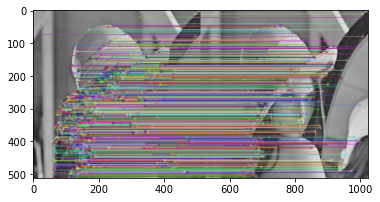

In [21]:
#1.2
# Matches for lena image using lowes ratio
matched_lena = cv2.BFMatcher()
num_matches_lena = matched_lena.knnMatch(lena_Descriptors,lena_Descriptors, k=2)
Arr_matches = [] 
for i,j in num_matches_lena:
    if i.distance < 0.8*j.distance: 
        Arr_matches.append([i])
num_matches_lena_drawn = cv2.drawMatchesKnn(lena_gray,lena_keypoints,lena_gray,lena_keypoints,Arr_matches,None,flags=2)
plt.imshow(num_matches_lena_drawn)


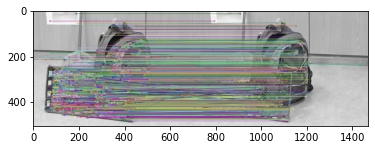

In [22]:
# Matches for backpack image using lowes ratio
matched_backpack = cv2.BFMatcher()
num_matches_backpack = matched_backpack.knnMatch(left_Descriptors, right_Descriptors, k=2)
Arr_matches = []
for i,j in num_matches_backpack:
    if i.distance < 0.8*j.distance:
        Arr_matches.append([i])
num_matches_backpack_drawn = cv2.drawMatchesKnn(left_backpack_img_GRAY,left_KeyPoints,right_backpack_img_GRAY,Right_KeyPoints,Arr_matches,None,flags=2)
plt.imshow(num_matches_backpack_drawn)

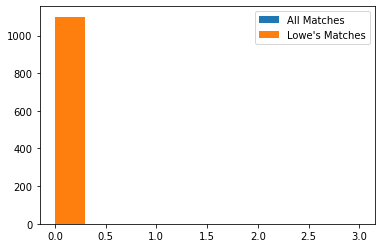

In [24]:
kepoint_distance_lena = []
for i,j in num_matches_lena:
    kepoint_distance_lena.append(abs(int(i.distance)))
    kepoint_distance_lena.append(abs(int(j.distance)))
maximum_distance = np.max(kepoint_distance_lena)

lowe_distance_lena = []
for i,j in num_matches_lena:
    if i.distance < 0.8*j.distance:
        lowe_distance_lena.append(abs(int(i.distance)))
maximum_lowe_distance = np.max(lowe_distance_lena)

plt.hist(kepoint_distance_lena, 10,(0,3), label='All Matches')
plt.hist(lowe_distance_lena, 10,(0,3), label='Lowe\'s Matches')
plt.legend(loc='upper right')
plt.show()

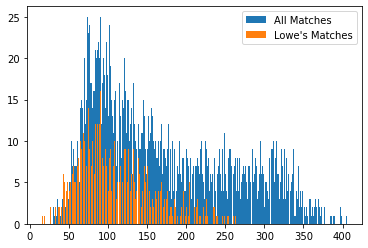

In [23]:
#Histogram plot all matches and lowes matches for backpack 
keypoint_distance = []
for i,j in num_matches_backpack:
    keypoint_distance.append(abs(int(i.distance)))
maximum_distance = np.max(keypoint_distance)

keypoint_distance2 = []
for i,j in num_matches_backpack:
    if i.distance < 0.8*j.distance:
        keypoint_distance2.append(abs(int(i.distance)))
maximum_distance2 = np.max(keypoint_distance2)
plt.hist(keypoint_distance, maximum_distance, label='All Matches')
plt.hist(keypoint_distance2, maximum_distance, label='Lowe\'s Matches')
plt.legend(loc='upper right')
plt.show()


In [ ]:
What Can be Drawn from this? 


The lena graph shows that the all matches and lowe's matches are one in the same, this is becuase we did not match between two of the same images for lena. 

The backpack histogram displays that the total matches do contain duplicated matches. This means that an optimal distance can be found between points using the matching method with the backpack images.



